<a href="https://colab.research.google.com/github/safaa12/new-york-taxi-trips/blob/main/new_york_taxi_trips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Importing the required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

### 2. Loading the data into the data frame and looking at what we have.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/new_york_taxi_trips10000.csv') # change according to the path on your drive

Mounted at /content/drive/


In [3]:
# To display the top 5 rows
df.head(5)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,2,2022-03-25 17:36:36.000000 UTC,2022-03-25 17:36:49.000000 UTC,1.0,0.0,1.0,N,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264,264,2022,3
1,1,2022-03-04 07:14:11.000000 UTC,2022-03-04 07:14:19.000000 UTC,1.0,0.0,1.0,N,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107,107,2022,3
2,2,2022-03-23 12:18:29.000000 UTC,2022-03-23 12:19:14.000000 UTC,1.0,0.0,1.0,N,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193,193,2022,3
3,1,2022-03-15 15:27:31.000000 UTC,2022-03-15 15:27:59.000000 UTC,1.0,0.1,99.0,N,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162,162,2022,3
4,2,2022-03-28 21:02:17.000000 UTC,2022-03-28 21:02:33.000000 UTC,1.0,0.0,1.0,N,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193,193,2022,3


In [4]:
df.tail(5)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
9995,2,2022-03-02 15:10:55.000000 UTC,2022-03-02 16:24:30.000000 UTC,1.0,17.79,2.0,N,1,52.0,0.0,0.5,12.37,6.55,0.3,0.0,74.22,233,132,2022,3
9996,2,2022-03-20 15:57:07.000000 UTC,2022-03-20 17:02:55.000000 UTC,3.0,22.03,2.0,N,1,52.0,0.0,0.5,12.37,6.55,0.3,0.0,74.22,125,132,2022,3
9997,2,2022-03-21 09:31:04.000000 UTC,2022-03-21 10:31:11.000000 UTC,1.0,20.05,2.0,N,1,52.0,0.0,0.5,12.37,6.55,0.3,0.0,74.22,132,246,2022,3
9998,2,2022-03-04 21:51:38.000000 UTC,2022-03-04 22:30:00.000000 UTC,1.0,21.64,2.0,N,1,52.0,0.0,0.5,12.37,6.55,0.3,0.0,74.22,239,132,2022,3
9999,2,2022-03-23 14:39:42.000000 UTC,2022-03-23 15:40:03.000000 UTC,2.0,17.24,2.0,N,1,52.0,0.0,0.5,12.37,6.55,0.3,0.0,74.22,229,132,2022,3


In [5]:
# בדיקה האם יש מרחקי נסיעה של 0 או פחות
invalid_distance = df[df['trip_distance'] <= 0]
print(f"Number of invalid distances: {len(invalid_distance)}")

# בדיקה האם יש מחיר נסיעה (fare_amount) שלילי
negative_fare = df[df['fare_amount'] < 0]
print(f"Number of negative fares: {len(negative_fare)}")

Number of invalid distances: 602
Number of negative fares: 460


In [6]:
# המרה לפורמט זמן אם עוד לא נעשה
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# בדיקה האם זמן הסיום מוקדם מזמן ההתחלה
time_bug = df[df['dropoff_datetime'] <= df['pickup_datetime']]
print(f"Number of time logic errors: {len(time_bug)}")

Number of time logic errors: 24


###ניתוח סטטיסטי

In [7]:
# המרה של העמודות למספרים (float)
df['trip_distance'] = pd.to_numeric(df['trip_distance'], errors='coerce')
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')

# כעת נריץ שוב את הסטטיסטיקה - הפעם היא תראה אחרת לגמרי!
print(df[['trip_distance', 'total_amount']].describe())

       trip_distance  total_amount
count   10000.000000  10000.000000
mean        8.038063     38.038690
std         7.722372     24.905331
min         0.000000    -23.300000
25%         3.260000     22.330000
50%         4.360000     24.750000
75%        16.490000     65.100000
max       304.300000    264.410000


###ניקוי נתונים מרעשים

In [8]:
# נשאיר רק נסיעות עם מרחק חיובי ומחיר מינימלי הגיוני (למשל מעל 2.5 דולר שזה מחיר פתיחה)
df_clean = df[df['dropoff_datetime'] > df['pickup_datetime']]
df_clean = df[(df['trip_distance'] > 0) & (df['total_amount'] > 2.5)].copy()
# בדיקה כמה שורות איבדנו ב"סינון"
print(f"שורות מקוריות: {len(df)}")
print(f"שורות לאחר ניקוי: {len(df_clean)}")
print(f"אחוז הדאטה ה'פגום' שהסרנו: {((len(df) - len(df_clean)) / len(df)) * 100:.2f}%")

שורות מקוריות: 10000
שורות לאחר ניקוי: 9068
אחוז הדאטה ה'פגום' שהסרנו: 9.32%


###Feature Engineering

In [20]:
# 1. המרת עמודות הזמן לפורמט של פייתון
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'])

# 2. חילוץ השעה ביום (0-23)
df_clean['hour'] = df_clean['pickup_datetime'].dt.hour

# 3. חילוץ היום בשבוע (Monday, Tuesday...)
df_clean['day_of_week'] = df_clean['pickup_datetime'].dt.day_name()

# 4. יצירת משתנה בינארי: האם הנסיעה היא בשעות העומס? (למשל 7-9 בבוקר או 16-18 אחה"צ)
df_clean['is_rush_hour'] = df_clean['hour'].apply(lambda x: 1 if x in [7,8,9,16,17,18] else 0)

print("משתנים חדשים נוצרו בהצלחה!")
df_clean[['pickup_datetime', 'hour', 'day_of_week', 'is_rush_hour']].head()

משתנים חדשים נוצרו בהצלחה!


,pickup_datetime,hour,day_of_week,is_rush_hour
140,2022-03-26 01:51:28+00:00,1,Saturday,0
141,2022-03-20 01:00:57+00:00,1,Sunday,0
143,2022-03-03 10:34:21+00:00,10,Thursday,0
144,2022-03-19 02:50:34+00:00,2,Saturday,0
145,2022-03-16 01:51:08+00:00,1,Wednesday,0


###Visualization

/tmp/ipython-input-1459195872.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='tip_amount', data=df_clean, order=days_order, palette='viridis')


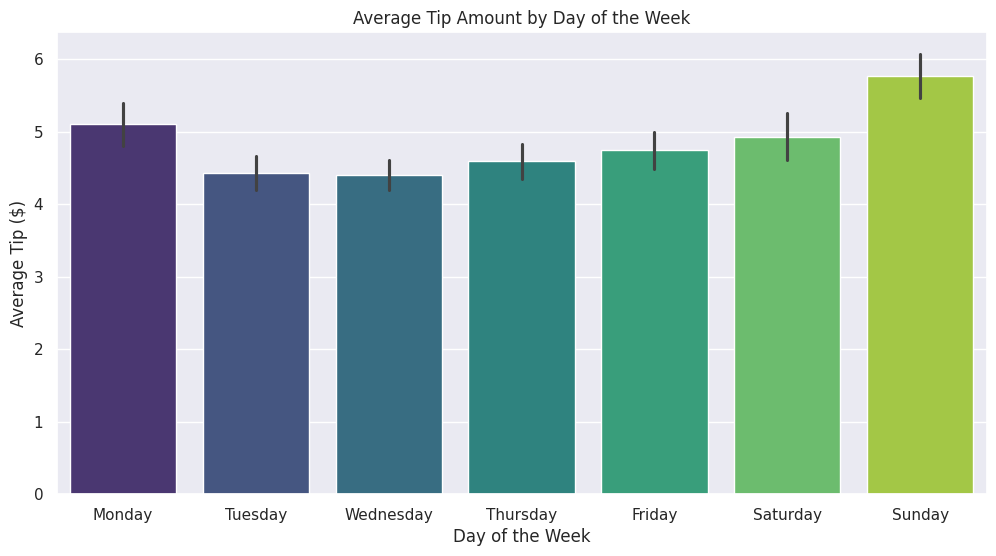

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# הגדרת סדר הימים
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='tip_amount', data=df_clean, order=days_order, palette='viridis')
plt.title('Average Tip Amount by Day of the Week')
plt.ylabel('Average Tip ($)')
plt.xlabel('Day of the Week')
plt.show()

In [11]:
# המרה למספר (חשוב מאוד!)
df_clean['tip_amount'] = pd.to_numeric(df_clean['tip_amount'], errors='coerce')

# מילוי ערכים חסרים ב-0 (אם יש נסיעות ללא מידע על טיפ)
df_clean['tip_amount'] = df_clean['tip_amount'].fillna(0)

###Heatmap of average tips: Day vs. Hour

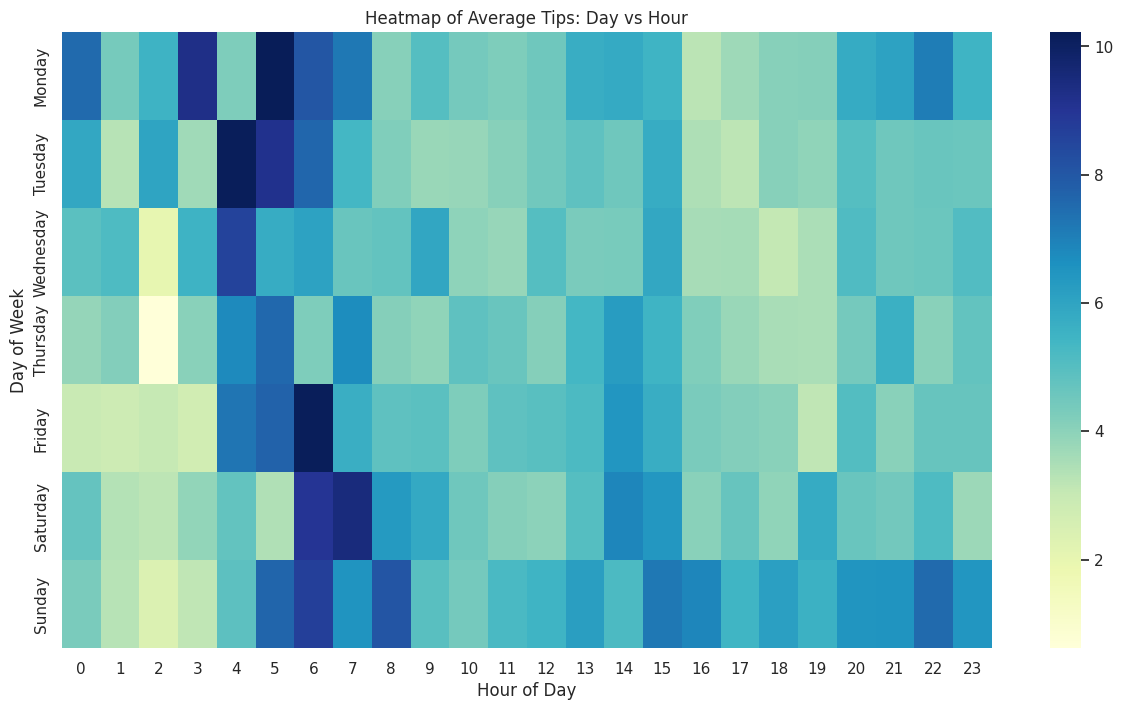

In [12]:
# יצירת טבלת ציר (Pivot Table) לניתוח שעה מול יום
heatmap_data = df_clean.pivot_table(index='day_of_week', columns='hour', values='tip_amount', aggfunc='mean').reindex(days_order)

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu')
plt.title('Heatmap of Average Tips: Day vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

###בדיקת אם יש קשר בין מרחק הנסיעה לבין גודל הטיפ

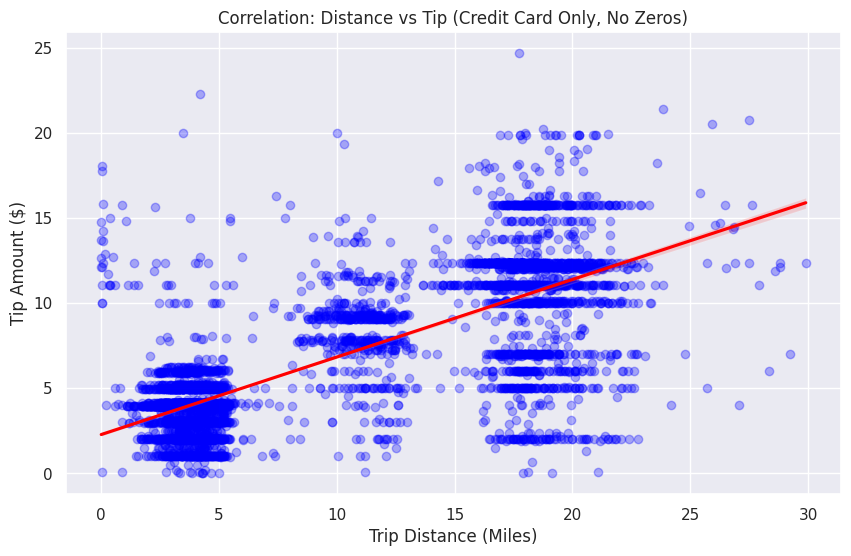

מקדם המתאם (Correlation) החדש הוא: 0.76


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. סינון ראשוני - החלק הכי חשוב!
# נניח ש-1 זה אשראי (סטנדרט במוניות ניו יורק). נסנן רק אשראי.
df_clean = df_clean[df_clean['payment_type'] == 1].copy()

# סינון נוסף: נעיף טיפים שהם 0 (אם המטרה היא לחזות גובה טיפ בהינתן שניתן טיפ)
# או שנשאיר אותם אם רוצים לחזות הכל. לצורך הניסוי, בוא נסנן אותם כדי לראות את הקשר הנקי:
df_clean = df_clean[df_clean['tip_amount'] > 0]

# סינון חריגים קיצוניים כדי שהגרף יהיה ברור
df_clean = df_clean[(df_clean['trip_distance'] < 30) & (df_clean['tip_amount'] < 25)]

# 2. יצירת גרף המתאם הנקי
plt.figure(figsize=(10, 6))

# שימוש ב-regplot שמראה גם את הנקודות וגם את קו המגמה
sns.regplot(x='trip_distance', y='tip_amount', data=df_clean,
            scatter_kws={'alpha': 0.3, 'color': 'blue'}, # שקיפות לנקודות
            line_kws={'color': 'red'}) # קו אדום בולט

plt.title('Correlation: Distance vs Tip (Credit Card Only, No Zeros)')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

# 3. בדיקה מהירה של הקורלציה המספרית
correlation = df_clean['trip_distance'].corr(df_clean['tip_amount'])
print(f"מקדם המתאם (Correlation) החדש הוא: {correlation:.2f}")

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 1. הכנת הנתונים (השתמש ב-df_clean שיצרת קודם, ללא האפסים)
X = df_clean[['trip_distance', 'rate_code']] # הוספנו גם את rate_code כמשתנה מסביר!
y = df_clean['tip_amount']

# חלוקה לאימון ומבחן
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- מודל 1: רגרסיה לינארית (הנוכחי שלך) ---
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f"Linear Regression R^2: {r2_score(y_test, lr_pred):.3f}")

# --- מודל 2: Random Forest (המתקדם) ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(f"Random Forest R^2: {r2_score(y_test, rf_pred):.3f}")

# בדיקה: כמה המודל החדש שיפר?
improvement = r2_score(y_test, rf_pred) - r2_score(y_test, lr_pred)
print(f"השיפור בשימוש ביער אקראי: {improvement*100:.1f}%")

Linear Regression R^2: 0.600
Random Forest R^2: 0.524
השיפור בשימוש ביער אקראי: -7.6%


In [31]:
# נשתמש בנתונים הנקיים שכבר יש לך (df_clean)
# נוודא שגם 'fare_amount' קיים ואין בו ערכים שליליים
df_final = df_clean[df_clean['fare_amount'] > 0].copy()

# הפעם המשתנים המסבירים כוללים את הכסף עצמו
X = df_final[['trip_distance', 'rate_code', 'fare_amount']]
y = df_final['tip_amount']

# חלוקה לאימון ומבחן
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# נריץ שוב את המנצח שלנו (רגרסיה לינארית)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print(f"Linear Regression with Fare Amount R^2: {r2_score(y_test, lr_pred):.3f}")

# נבדוק גם קורלציה ישירה בין מחיר לטיפ
print(f"Correlation (Fare vs Tip): {df_final['fare_amount'].corr(df_final['tip_amount']):.2f}")

Linear Regression with Fare Amount R^2: 0.649
Correlation (Fare vs Tip): 0.80


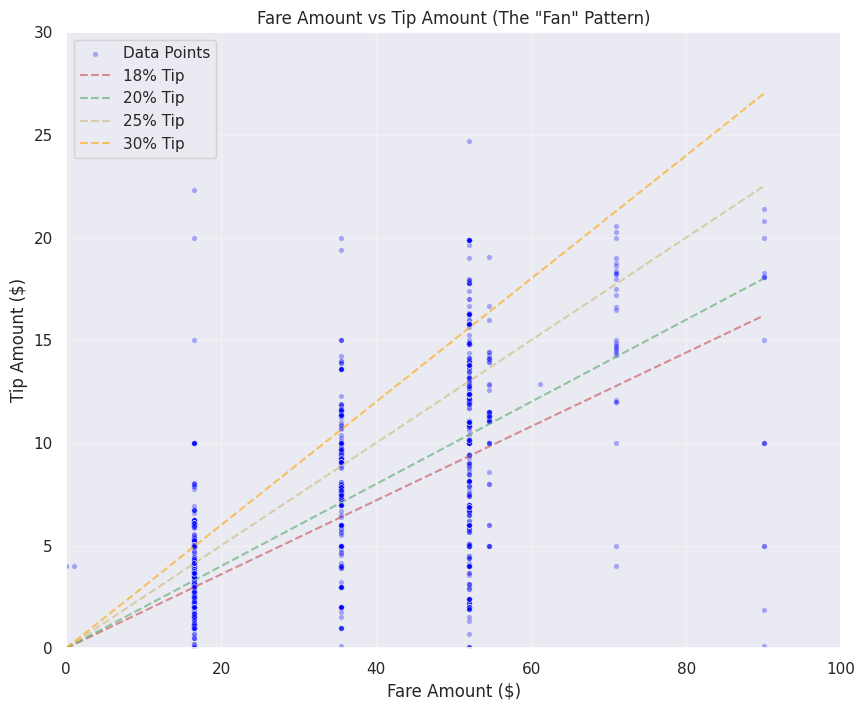

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# הגדרת הגרף
plt.figure(figsize=(10, 8))

# ציור הנקודות - נשתמש בנקודות קטנות ושקופות כדי לראות את הצפיפות
sns.scatterplot(x='fare_amount', y='tip_amount', data=df_final,
                alpha=0.3, s=15, color='blue', label='Data Points')

# --- הוספת קווי עזר של אחוזים נפוצים ---
# זה יעזור לך לראות אם הנקודות "מתמגנטות" לאחוזים האלה
x_range = np.linspace(0, df_final['fare_amount'].max(), 100)
plt.plot(x_range, x_range * 0.18, 'r--', alpha=0.6, label='18% Tip')
plt.plot(x_range, x_range * 0.20, 'g--', alpha=0.6, label='20% Tip')
plt.plot(x_range, x_range * 0.25, 'y--', alpha=0.6, label='25% Tip')
plt.plot(x_range, x_range * 0.30, 'orange', linestyle='--', alpha=0.6, label='30% Tip')


plt.title('Fare Amount vs Tip Amount (The "Fan" Pattern)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Tip Amount ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 100) # התמקדות בנסיעות עד 100 דולר
plt.ylim(0, 30)
plt.show()

מסקנות:

1. מספר קווים ישרים שיוצאים מאותה נקודה זה כל "קו" מייצג אחוז טיפ אחר

2.    R^2=0.65 מודל הרגרסיה הליניארית מסביר 65% מהשונות
אחוז זה מספיק טוב כדי לחזות את גובה הטיפ, אפשר להסיק גם ככל שהמחיר עולה, הטיפ יעלה בהתאמה


